## **SCORING - Vitamin E: Workflow 7**
#### **Micha Birklbauer 2021-08-11**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:HIS130B,Salt_Bridge:GLU622B,Hydrogen_Bond:GLU108B,Hydrophobic_Interaction:ARG112B,Hydrogen_Bond:ARG47B,Hydrogen_Bond:ASP166B,Salt_Bridge:ARG401B,Hydrophobic_Interaction:GLU108B,...,Hydrophobic_Interaction:LYS83B,Hydrogen_Bond:TRP102B,Hydrophobic_Interaction:GLU16B,Hydrophobic_Interaction:LEU111B,Hydrophobic_Interaction:ALA388B,Hydrophobic_Interaction:TYR100B,Salt_Bridge:ASP166B,Hydrophobic_Interaction:VAL110B,Hydrophobic_Interaction:VAL397B,LABEL
0,1,124|VitaminE_allmin_active|sdf|124,1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,1,active
1,2,47|VitaminE_allmin_active|sdf|47,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,active
2,3,49|VitaminE_allmin_active|sdf|49,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,active
3,4,63|VitaminE_allmin_decoy|sdf|63,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,inactive
4,5,123|VitaminE_allmin_active|sdf|123,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,103|VitaminE_allmin_active|sdf|103,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,active
85,86,108|VitaminE_allmin_decoy|sdf|108,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,inactive
86,87,127|VitaminE_allmin_active|sdf|127,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
87,88,67|VitaminE_allmin_decoy|sdf|67,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(89, 121) 59


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(23, 121) 16


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(29, 121) 19


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:VAL110B,0.314689,0.881356,0.566667
1,2,Hydrogen_Bond:GLN15B,0.313559,0.186441,0.500000
2,3,Hydrophobic_Interaction:PHE393B,0.214124,0.152542,0.366667
3,4,Hydrogen_Bond:TRP102B,0.211864,0.288136,0.500000
4,5,Hydrogen_Bond:GLU134B,0.189266,0.355932,0.166667
...,...,...,...,...,...
113,114,Hydrophobic_Interaction:GLN129B,0.001695,0.101695,0.100000
114,115,Hydrogen_Bond:GLN129B,0.000565,0.033898,0.033333
115,116,Hydrogen_Bond:LYS83B,0.000565,0.033898,0.033333
116,117,Hydrogen_Bond:ASP106B,0.000565,0.033898,0.033333


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.797752808988764
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.797752808988764
Key: 0.0, 0.0, 0.1: strat3 Accuracy: 0.797752808988764
Key: 0.0, 0.0, 0.1: strat4 Accuracy: 0.797752808988764
Key: 0.05, 0.0, 0.0: strat3 Accuracy: 0.797752808988764


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.8468926553672317
Key: 0.0, 0.0, 0.0: strat2 Area under the ROC curve: 0.8353107344632769
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.823728813559322
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8146892655367232
Key: 0.0, 0.05, 0.0: strat1 Area under the ROC curve: 0.8121468926553673


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.05, 0.0: strat4 Accuracy: 0.782608695652174
Key: 0.0, 0.0, 0.05: strat3 Accuracy: 0.7391304347826086
Key: 0.0, 0.0, 0.05: strat4 Accuracy: 0.7391304347826086
Key: 0.0, 0.0, 0.1: strat3 Accuracy: 0.7391304347826086
Key: 0.0, 0.0, 0.1: strat4 Accuracy: 0.7391304347826086


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.7366071428571429
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.7366071428571428
Key: 0.0, 0.05, 0.0: strat4 Area under the ROC curve: 0.6830357142857143
Key: 0.0, 0.05, 0.0: strat3 Area under the ROC curve: 0.6785714285714286
Key: 0.05, 0.0, 0.0: strat3 Area under the ROC curve: 0.6741071428571428


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.05, 0.0)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:VAL110B,0.314689,0.881356,0.566667
1,2,Hydrogen_Bond:GLN15B,0.313559,0.186441,0.500000
2,3,Hydrophobic_Interaction:PHE393B,0.214124,0.152542,0.366667
3,4,Hydrogen_Bond:TRP102B,0.211864,0.288136,0.500000
4,5,Hydrogen_Bond:GLU134B,0.189266,0.355932,0.166667
...,...,...,...,...,...
109,110,Hydrophobic_Interaction:LEU615B,0.013559,0.186441,0.200000
110,111,Hydrophobic_Interaction:ARG401B,0.012994,0.220339,0.233333
111,112,Hydrophobic_Interaction:PHE402B,0.006215,0.372881,0.366667
112,113,Hydrophobic_Interaction:GLU134B,0.005650,0.338983,0.333333


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrogen_Bond:VAL110B',
 'Hydrogen_Bond:GLU134B',
 'Hydrophobic_Interaction:THR137B',
 'Pi-Cation_Interaction:HIS130B',
 'Hydrogen_Bond:GLU108B',
 'Hydrophobic_Interaction:LYS133B',
 'Hydrogen_Bond:HIS130B',
 'Hydrogen_Bond:ASP170B',
 'Hydrophobic_Interaction:VAL110B',
 'Hydrophobic_Interaction:GLU108B',
 'Hydrophobic_Interaction:ALA388B',
 'Hydrophobic_Interaction:GLU70B',
 'Hydrogen_Bond:TYR100B',
 'Hydrophobic_Interaction:PHE169B',
 'Hydrogen_Bond:ARG101B',
 'Hydrophobic_Interaction:ASP170B',
 'Hydrophobic_Interaction:LEU111B',
 'Salt_Bridge:ARG401B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrogen_Bond:TYR383B',
 'Hydrophobic_Interaction:ASN613B',
 'Hydrophobic_Interaction:GLN611B',
 'Hydrophobic_Interaction:VAL175B',
 'Hydrophobic_Interaction:LYS83B',
 'Hydrogen_Bond:LYS37B',
 'Hydrogen_Bond:LYS140B',
 'Salt_Bridge:HIS130B',
 'Hydrophobic_Interaction:GLU622B',
 'Hydrophobic_Interaction:LEU66B',
 'Hydrophobic_Interaction:TYR100B',
 'Hydrophobic_Interaction:ARG112B',
 'Salt_Bridge:

In [20]:
negatives

['Hydrogen_Bond:GLN15B',
 'Hydrophobic_Interaction:PHE393B',
 'Hydrogen_Bond:TRP102B',
 'Hydrogen_Bond:TYR81B',
 'Hydrophobic_Interaction:PRO621B',
 'Hydrophobic_Interaction:ARG138B',
 'Hydrophobic_Interaction:GLN141B',
 'Hydrogen_Bond:GLU622B',
 'Hydrophobic_Interaction:VAL397B',
 'Hydrophobic_Interaction:ARG101B',
 'Hydrophobic_Interaction:TYR142B',
 'Hydrophobic_Interaction:TYR383B',
 'Hydrophobic_Interaction:ASP166B',
 'Hydrogen_Bond:THR137B',
 'Hydrophobic_Interaction:TYR81B',
 'Hydrophobic_Interaction:GLN15B',
 'Hydrogen_Bond:ARG401B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:TRP102B',
 'Salt_Bridge:ARG101B',
 'Hydrogen_Bond:GLN168B',
 'Pi-Cation_Interaction:ARG101B',
 'Hydrophobic_Interaction:LEU615B',
 'Hydrophobic_Interaction:ARG401B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [5, 0.7528089887640449] 
Strategy 2:  [5, 0.7640449438202247] 
Strategy 3:  [-3, 0.7865168539325843] 
Strategy 4:  [-3, 0.7865168539325843]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -3, "accuracy")
)

Strategy 1:  0.7528089887640449 
Strategy 2:  0.7640449438202247 
Strategy 3:  0.7865168539325843 
Strategy 4:  0.7865168539325843


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 5, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), -3, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), -3, "fpr")
)

Strategy 1:  0.6333333333333333 
Strategy 2:  0.6333333333333333 
Strategy 3:  0.6 
Strategy 4:  0.6


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7528089887640449, 'FPR': 0.6333333333333333, 'AUC': 0.8121468926553673, 'Ya': 0.7466666666666667, 'EF': 1.1263276836158194, 'REF': 94.91525423728814} 
Strategy 2:  {'ACC': 0.7640449438202247, 'FPR': 0.6333333333333333, 'AUC': 0.8002824858757063, 'Ya': 0.75, 'EF': 1.13135593220339, 'REF': 96.61016949152543} 
Strategy 3:  {'ACC': 0.7865168539325843, 'FPR': 0.6, 'AUC': 0.7728813559322034, 'Ya': 0.7631578947368421, 'EF': 1.1512042818911687, 'REF': 98.30508474576271} 
Strategy 4:  {'ACC': 0.7865168539325843, 'FPR': 0.6, 'AUC': 0.7607344632768361, 'Ya': 0.7631578947368421, 'EF': 1.1512042818911687, 'REF': 98.30508474576271}


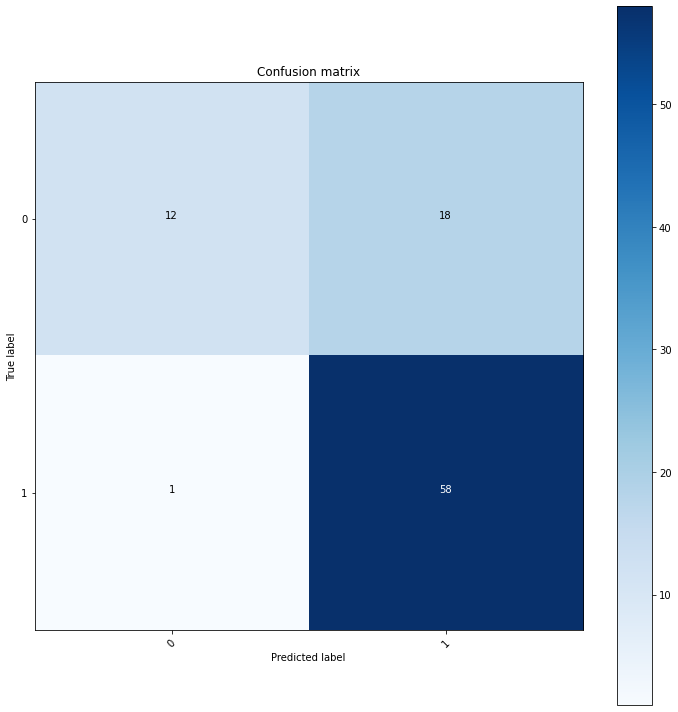

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_train_strat4.png");

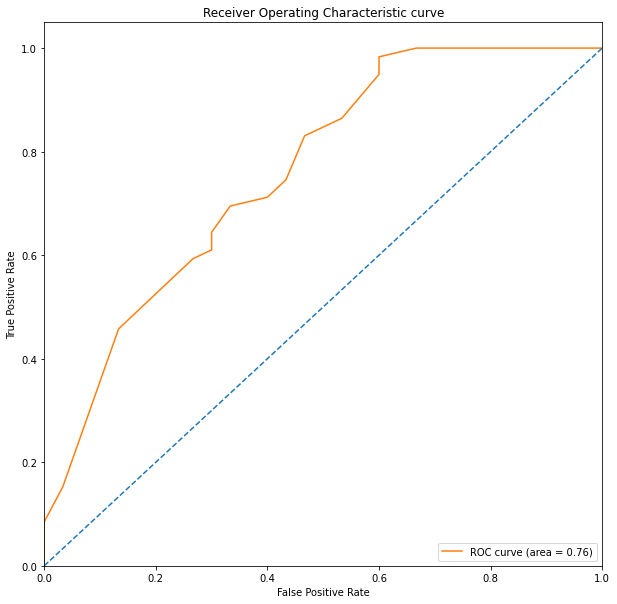

In [29]:
roc = get_metrics(train_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat4.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6521739130434783, 'FPR': 0.7142857142857143, 'AUC': 0.59375, 'Ya': 0.7222222222222222, 'EF': 1.0381944444444444, 'REF': 81.25} 
Strategy 2:  {'ACC': 0.6521739130434783, 'FPR': 0.7142857142857143, 'AUC': 0.6026785714285714, 'Ya': 0.7222222222222222, 'EF': 1.0381944444444444, 'REF': 81.25} 
Strategy 3:  {'ACC': 0.7391304347826086, 'FPR': 0.7142857142857143, 'AUC': 0.6785714285714286, 'Ya': 0.75, 'EF': 1.078125, 'REF': 93.75} 
Strategy 4:  {'ACC': 0.782608695652174, 'FPR': 0.7142857142857143, 'AUC': 0.6830357142857143, 'Ya': 0.7619047619047619, 'EF': 1.0952380952380951, 'REF': 100.0}


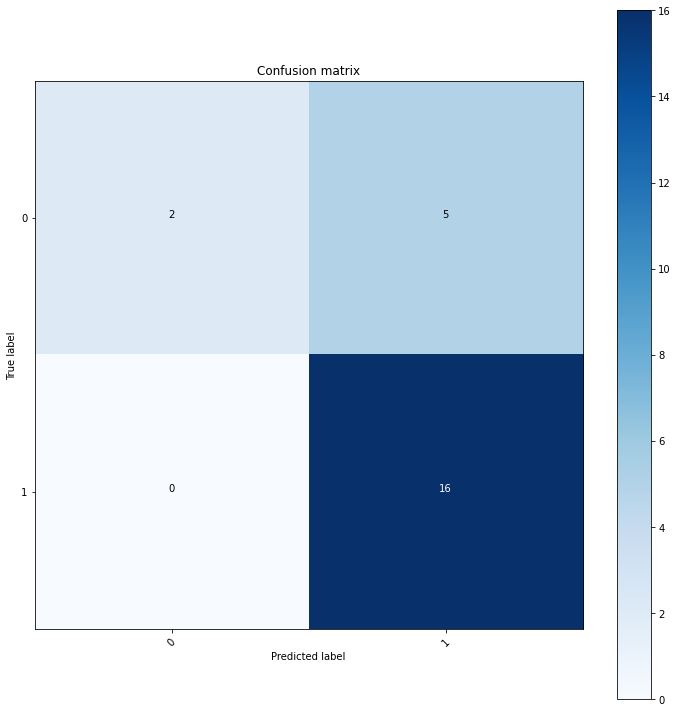

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_val_strat4.png");

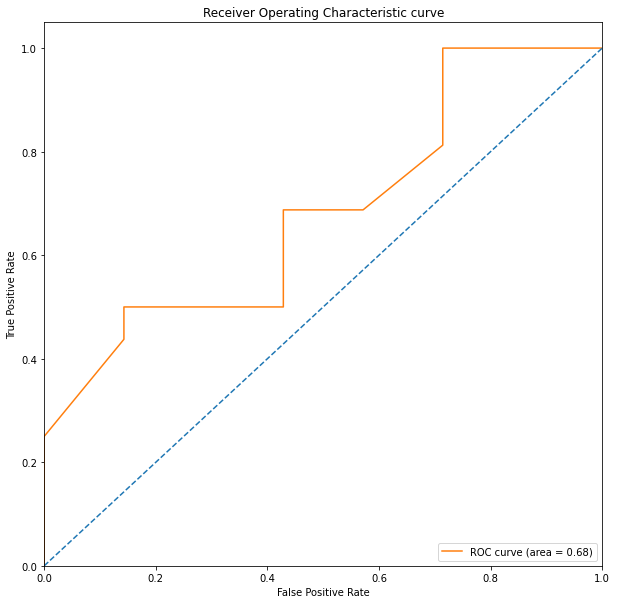

In [32]:
roc = get_metrics(val_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat4.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 5, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 5, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, -3, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, -3, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6206896551724138, 'FPR': 0.8, 'AUC': 0.47894736842105257, 'Ya': 0.6666666666666666, 'EF': 1.0175438596491229, 'REF': 84.21052631578948} 
Strategy 2:  {'ACC': 0.6206896551724138, 'FPR': 0.8, 'AUC': 0.5236842105263159, 'Ya': 0.6666666666666666, 'EF': 1.0175438596491229, 'REF': 84.21052631578948} 
Strategy 3:  {'ACC': 0.6551724137931034, 'FPR': 0.8, 'AUC': 0.4921052631578947, 'Ya': 0.68, 'EF': 1.0378947368421054, 'REF': 89.47368421052632} 
Strategy 4:  {'ACC': 0.6551724137931034, 'FPR': 0.8, 'AUC': 0.5052631578947369, 'Ya': 0.68, 'EF': 1.0378947368421054, 'REF': 89.47368421052632}


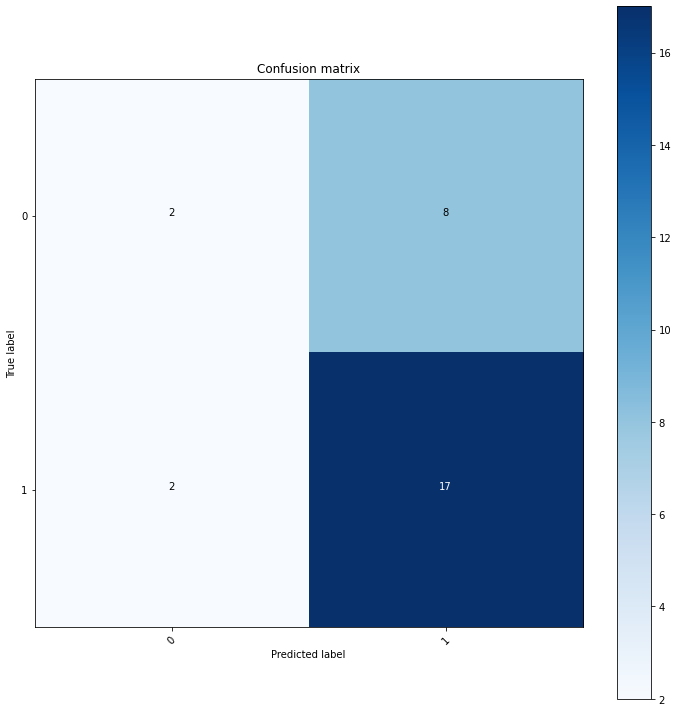

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat4, -3)["CM"], classes = [0, 1], filename = "results/CM_test_strat4.png");

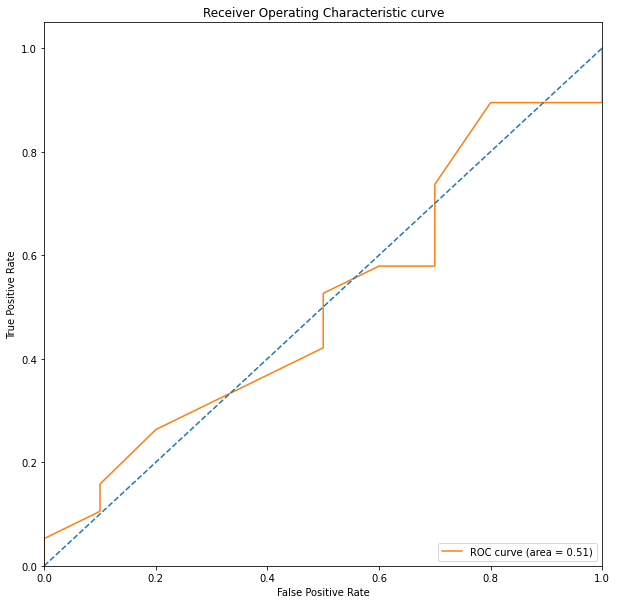

In [35]:
roc = get_metrics(test_result_strat4, -3)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat4.png");

#### **Clean up:**

In [36]:
os.remove("scoring.py")